In [1]:
import pandas as pd
import networkx as nx
import matplotlib as plt

# Create a DataLineage Table
df_glue = pd.read_csv('/Users/ed/writing/kcd/goo_utils/resources/glue_meta.csv')
df_egretta = pd.read_csv('/Users/ed/writing/kcd/goo_utils/resources/egretta_meta_info.csv')

In [2]:
df_egretta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1507 non-null   int64 
 1   source      1507 non-null   object
 2   sink        1507 non-null   object
 3   filename    1507 non-null   object
 4   jobname     1507 non-null   object
 5   src_attr    1507 non-null   object
 6   sink_attr   1507 non-null   object
dtypes: int64(1), object(6)
memory usage: 82.5+ KB


In [3]:
# print(df_egretta.head(5))

df_temp = df_egretta.merge(df_glue, how='left', left_on='source', right_on='location', suffixes = (None,"src"))
df_temp = df_temp.merge(df_glue, how='left', left_on='sink', right_on='location', suffixes= (None,"_sink"))
print(df_temp.columns)

df_temp = df_temp[['filename','jobname','source','sink','db_name','table_name','db_name_sink','table_name_sink']]
df_temp.columns = ['filename','job_name','source_name','sink_name','db_src','tb_src','db_sink','tb_sink']
df_temp.sort_values('filename')
df_temp.to_csv('/Users/ed/writing/kcd/goo_utils/resources/data_lineage.csv',index=False)


Index(['Unnamed: 0', 'source', 'sink', 'filename', 'jobname', 'src_attr',
       'sink_attr', 'db_name', 'table_name', 'location', 'db_name_sink',
       'table_name_sink', 'location_sink'],
      dtype='object')


In [57]:
df_temp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 0 to 1886
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1887 non-null   object
 1   job_name     1887 non-null   object
 2   source_name  1887 non-null   object
 3   sink_name    1887 non-null   object
 4   db_src       0 non-null      object
 5   tb_src       0 non-null      object
 6   db_sink      0 non-null      object
 7   tb_sink      0 non-null      object
dtypes: object(8)
memory usage: 132.7+ KB


In [63]:
df_lineage = df_temp
nodes = pd.unique(df_lineage['source_name'] + df_lineage['sink_name'] )

G = nx.DiGraph()
G.add_nodes_from(nodes)

In [64]:
len(nodes)

1559

In [60]:

# for row in df_lineage.iterrows():


In [31]:
# edges = map(lambda idx: (df_lineage[idx]["source_table"],df_lineage[idx]["sink_table"]), df_lineage.iterrows())
# print(edges[:5])
# G.add_edges_from(edges)

In [65]:
edges = []
for idx, row in df_lineage.iterrows():
    edge = (row["source_name"], row["sink_name"])
    edges.append(edge)

G.add_edges_from(edges)

In [66]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 2598\nNumber of edges: 1559\nAverage in degree:   0.6001\nAverage out degree:   0.6001'

In [67]:
root_nodes = [x for x in G.nodes() if G.out_degree(x)!=0 and G.in_degree(x)==0]
leave_nodes = [x for x in G.nodes() if G.out_degree(x)==0 and G.in_degree(x)!=0]

In [72]:
for x in G.nodes():
    print(x, G.in_degree(x))

purchasespurchases_sink 0
purchases_with_sequencepurchases_sink 0
purchases_sinkpurchases_sink 0
businessesfilesink:::pos_agents 0
business_daysfilesink:::pos_agents 0
iamport_customersfilesink:::pos_agents 0
credentialsfilesink:::pos_agents 0
credential_keysfilesink:::pos_agents 0
membershipsfilesink:::pos_agents 0
phonesfilesink:::pos_agents 0
subscriptionsfilesink:::pos_agents 0
placesfilesink:::pos_agents 0
bank_accountsfilesink:::pos_agents 0
delivery_appsfilesink:::pos_agents 0
hometax_businessesfilesink:::pos_agents 0
hometax_tax_paymentsfilesink:::pos_agents 0
hometax_tax_noticesfilesink:::pos_agents 0
hometax_tax_refundsfilesink:::pos_agents 0
hometax_overdue_taxesfilesink:::pos_agents 0
hometax_sales_declarationsfilesink:::pos_agents 0
hometax_wht_declarationsfilesink:::pos_agents 0
hometax_vat_declarationsfilesink:::pos_agents 0
scrapingsfilesink:::pos_agents 0
tradersfilesink:::pos_agents 0
cardsfilesink:::pos_agents 0
card_merchantsfilesink:::pos_agents 0
shinhancard_busin

In [73]:
len(G.nodes())

2598

In [74]:
len(root_nodes)

910

In [75]:
len(leave_nodes)

129

In [76]:
# https://stackoverflow.com/questions/32935510/networkx-digraph-create-subgraph-digraph-by-node

def create_subgraph(g,sub_g,start_node):
    for n in g.predecessors(start_node):
        sub_g.add_edge(n,start_node)
        create_subgraph(g,sub_g,n)

In [80]:
# G.nodes("card_payments")
G["purchase_sink"]
G.out_degree("purchase_sink")

KeyError: 'purchase_sink'

In [78]:
subG = nx.DiGraph()
create_subgraph(G, subG, "purchase_sink")

DL = nx.nx_agraph.to_agraph(subG)

# default
# plt.figure(figsize=(10, 6))
DL.layout()
DL.draw('kcd_data_lineage.png')

# plt.figure(2)
# nx.draw(G,pos,node_size=60,font_size=8)
#
# plt.figure(3,figsize=(12,12))
# nx.draw(G,pos)
# plt.show()

NetworkXError: The node purchase_sink is not in the digraph.

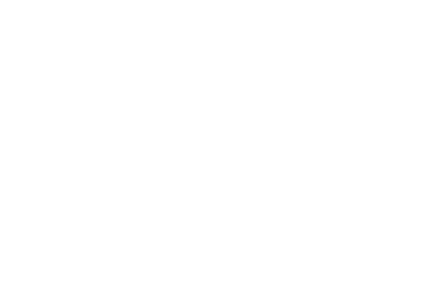

In [49]:
pos=nx.spring_layout(DL) #default to scale=1
nx.draw(DL,pos)

